In [1]:
import pandas as pd
df = pd.read_csv('boston_dataset.csv')

df = df.rename(columns = {
    "TOWN": "CIUDAD",
    "CRIM": "INDICE_CRIMEN",
    "ZN": "PCT_ZONA_RESIDENCIAL",
    "INDUS": "PCT_ZONA_INDUSTRIAL",
    "CHAS": "RIO_CHARLES",
    "NOX": "OXIDO_NITROSO_PPM",
    "RM": "N_HABITACIONES_MEDIO",
    "AGE": "PCT_CASAS_40S",
    "DIS_EMPLEO": "DISTANCIA_CENTRO_EMPLEO",
    "RAD": "DIS_AUTOPISTAS",
    "TAX": "CARGA_FISCAL",
    "PTRATIO": "RATIO_PROFESORES",
    "B": "PCT_NEGRA",
    "MEDV": "VALOR_MEDIANO",
    "LSTAT": "PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [2]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

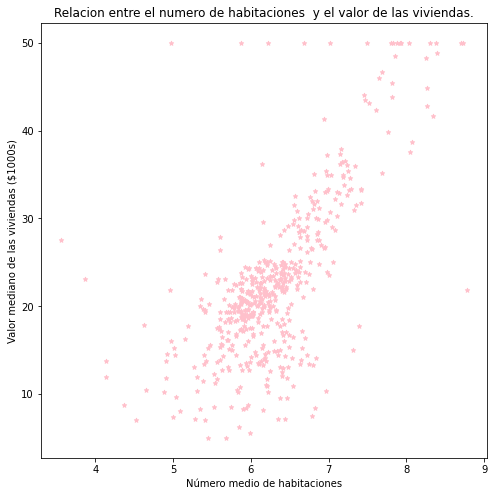

In [3]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink", figsize=(8,8))
plt.title("Relacion entre el numero de habitaciones  y el valor de las viviendas.")
plt.xlabel("Número medio de habitaciones")
plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [4]:
# Cambiar el tamaño por defecto de las gráficas
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)

In [5]:
# Estilos disponibles para las gráficas
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
# Usar un estilo específico
plt.style.use('dark_background')

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

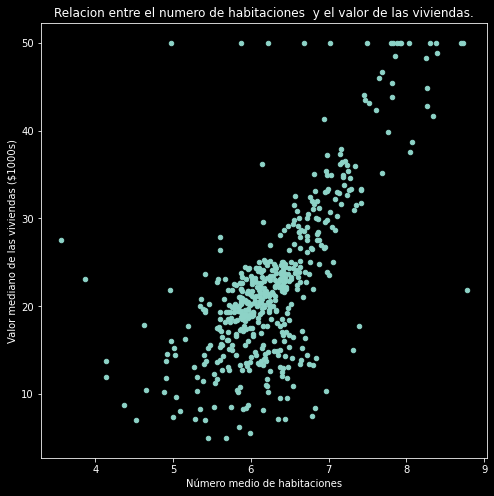

In [7]:
df.plot.scatter(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO")
plt.title("Relacion entre el numero de habitaciones  y el valor de las viviendas.")
plt.xlabel("Número medio de habitaciones")
plt.ylabel("Valor mediano de las viviendas ($1000s)")

In [8]:
from ipywidgets import interact

In [9]:
@interact(col1=df.columns.tolist())
def grafico_variable(col1):
    df.plot.scatter(x=col1, y='VALOR_MEDIANO')
    plt.title("{} vs VALOR_MEDIANO".format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

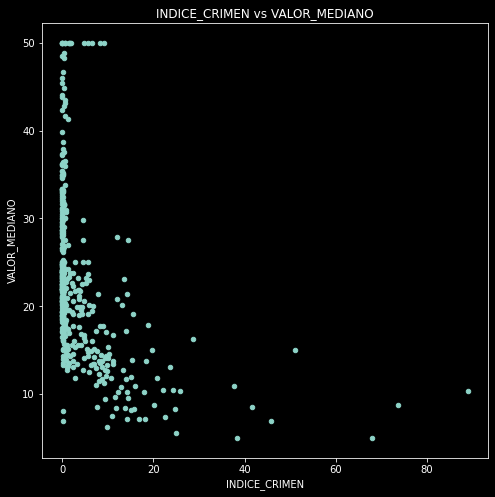

In [10]:
grafico_variable("INDICE_CRIMEN")

<AxesSubplot:xlabel='LON', ylabel='LAT'>

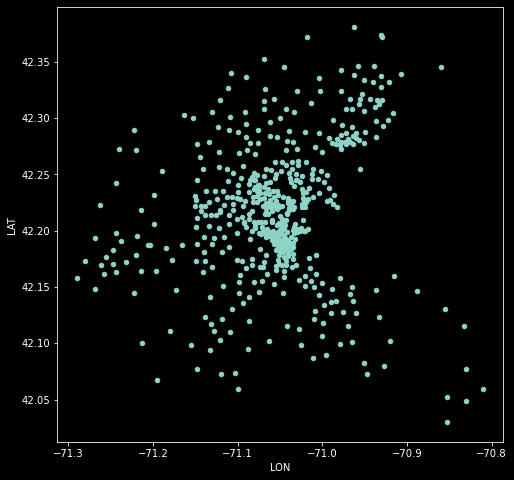

In [11]:
df.plot.scatter(x="LON", y="LAT")

In [12]:
import cartopy.crs as ccrs
from cartopy.io import img_tiles

<AxesSubplot:ylabel='Density'>

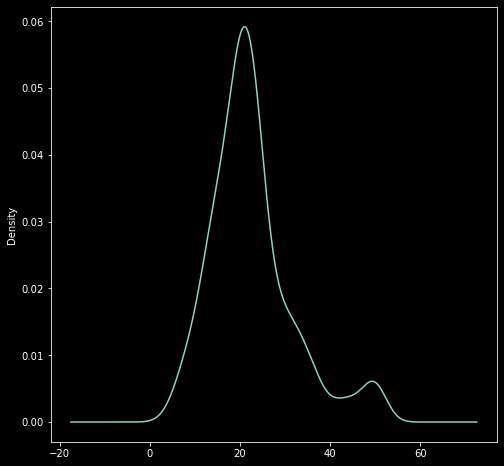

In [15]:
df.VALOR_MEDIANO.plot.kde()

In [14]:
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)
primer_quintil

15.3

In [17]:
cuarto_quintil = df.VALOR_MEDIANO.quantile(0.8)
cuarto_quintil

28.2

<ipython-input-19-a687fc1ec560>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(df_primer_qt.LON,df_primer_qt.LAT, transform=ccrs.Geodetic(),
<ipython-input-19-a687fc1ec560>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(df_cuarto_qt.LON,df_cuarto_qt.LAT, transform=ccrs.Geodetic(),


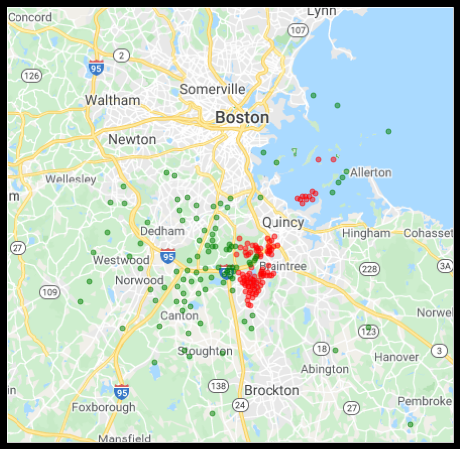

In [19]:
imagery = img_tiles.GoogleTiles()

ax = plt.axes(projection=imagery.crs)

limites_mapa = (-71.38, -70.77, 42.03, 42.47)
ax.set_extent(limites_mapa)
ax.add_image(imagery, 10)

df_primer_qt = df[df.VALOR_MEDIANO<primer_quintil]

df_cuarto_qt = df[df.VALOR_MEDIANO>cuarto_quintil]

plt.plot(df_primer_qt.LON,df_primer_qt.LAT, transform=ccrs.Geodetic(), 
         marker=".", markersize=10, color="red", lineWidth=0, alpha=0.5 )

plt.plot(df_cuarto_qt.LON,df_cuarto_qt.LAT, transform=ccrs.Geodetic(), 
         marker=".", markersize=10, color="green", lineWidth=0, alpha=0.5 )


In [20]:
import seaborn as sns

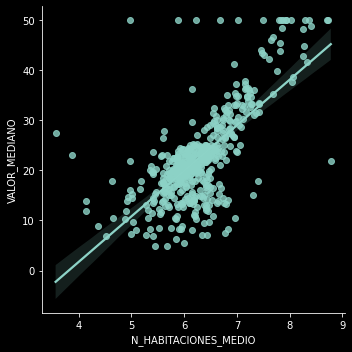

In [21]:
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", data=df )

<AxesSubplot:>

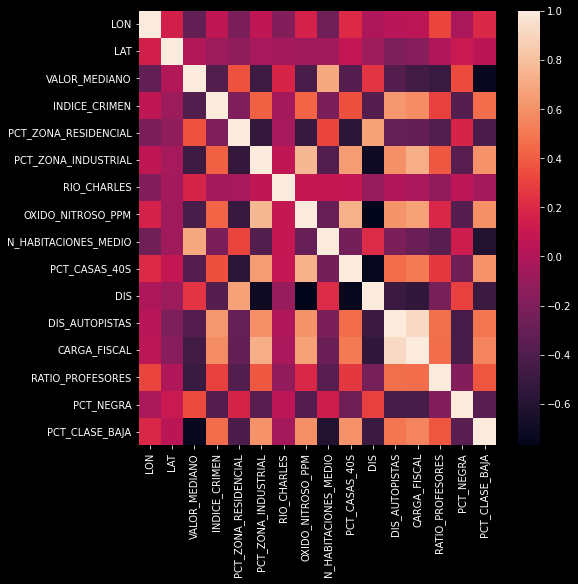

In [22]:
sns.heatmap(df.corr())

In [24]:
import bokeh.plotting as bk
bk.output_notebook()

Loading BokehJS ...

In [29]:
df["CRIMEN_QUINTIL"] = pd.qcut(df.INDICE_CRIMEN, 5)

In [30]:
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]], dtype='interval[float64, right]')

In [31]:
from bokeh.palettes import brewer
colors = brewer["Spectral"][len(df.CRIMEN_QUINTIL.unique())]
colors

('#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c')

In [32]:
p = bk.figure(
    plot_width=600,
    plot_height=600,
    title="Habitaciones vs Valor vivienda vs crimen"
    
)

for i, quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories): 
    df_q = df[df.CRIMEN_QUINTIL == quintil]
    p.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO, 
              color=colors[i], legend="({}-{})".format(quintil.left, quintil.right))
bk.show(p)

In [33]:
import numpy as np

hist, edges = np.histogram(df.VALOR_MEDIANO, bins=20)

In [36]:
p1 = bk.figure(title="Histograma valor viviendas", tools="save, hover", background_fill_color="#E8DDCB")

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="#026560")
bk.show(p1)


In [41]:
from altair import Chart, Color, Scale

In [49]:
chart = Chart(df)
scale = Scale(range=["#996666", "#b34d4d", "#cc3333", "#e61919", "#ff0000"])

chart.mark_point().encode(
    x="N_HABITACIONES_MEDIO",
    y="VALOR_MEDIANO",
    color=Color("CRIMEN_QUINTIL", scale=scale)
)

TypeError: Object of type Interval is not JSON serializable

alt.Chart(...)